In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import an image
image = plt.imread('3pahwn.jpg')

In [4]:
# get the shape of that image
x = image.shape

In [5]:
# shape of image is (rows, cols, RGB)
x

(853, 999, 3)

In [6]:
# this is the data of the first row
print(image[0])
# this will return 999 i.e. the number of cols
print(len(image[0]))
#every value is list of 3 values for red, green, and blue

[[34 48 35]
 [29 43 30]
 [23 37 24]
 ...
 [32 47 40]
 [32 48 38]
 [32 47 40]]
999


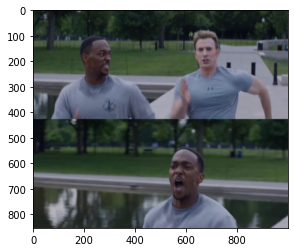

In [7]:
plt.imshow(image)

In [8]:
# now you can use np.fft.fft2 to create the foureir transform for the 2d array
# but for simplicity you can do the following steps

In [9]:
# 1 - reshape the array into one-dimensional array by using the following function with -1 as a parameter
y = np.reshape(image, -1)

In [10]:
# now if you check the reshaped array it will look something like
# R1, G1, B1, R2, G2, B2,...etc for every pixel in the image
y[0:10]

array([34, 48, 35, 29, 43, 30, 23, 37, 24, 20], dtype=uint8)

In [11]:
# then you get the fft for the reshaped one-dimensional array
fft = np.fft.fft(y)

In [12]:
fft

array([ 1.87977507e+08       +0.j        ,
       -1.09556930e+07-15156724.40447757j,
       -1.44409740e+07+42455530.59832753j, ...,
       -1.49948474e+06 +6434936.74783585j,
       -1.44409740e+07-42455530.59832752j,
       -1.09556930e+07+15156724.40447756j])

In [14]:
# then you seperate the angle of the fft and the magnitude by using np.angle
# and np.abs
angle = np.angle(fft)

In [15]:
angle

array([ 0.        , -2.19667886,  1.89866348, ...,  1.79973341,
       -1.89866348,  2.19667886])

In [16]:
mag = np.abs(fft)

In [17]:
mag

array([1.87977507e+08, 1.87016979e+07, 4.48443286e+07, ...,
       6.60733421e+06, 4.48443286e+07, 1.87016979e+07])

In [18]:
# and After manipulating your data, you combine the angle and magnitude back together and get
# inverse foureir transform
combine = np.multiply(mag, np.exp(1j * angle))
Inverse = np.real(np.fft.ifft(combine))

In [19]:
# right now the invevrse foureir is one-dimensional array
# so you want to make it go back to the original shape
# this is done by using shape function, but this time passing
# the original shape x as an argument

In [20]:
Inverse = Inverse.reshape(x)

In [22]:
# then you round the array to take integer values for the pixels
Inverse.round()

array([[[ 34.,  48.,  35.],
        [ 29.,  43.,  30.],
        [ 23.,  37.,  24.],
        ...,
        [ 32.,  47.,  40.],
        [ 32.,  48.,  38.],
        [ 32.,  47.,  40.]],

       [[ 36.,  50.,  37.],
        [ 31.,  45.,  32.],
        [ 25.,  39.,  26.],
        ...,
        [ 32.,  48.,  38.],
        [ 31.,  47.,  37.],
        [ 31.,  46.,  39.]],

       [[ 37.,  51.,  38.],
        [ 32.,  46.,  33.],
        [ 27.,  41.,  28.],
        ...,
        [ 31.,  47.,  37.],
        [ 31.,  47.,  37.],
        [ 30.,  45.,  38.]],

       ...,

       [[ 34.,  39.,  33.],
        [ 33.,  38.,  32.],
        [ 32.,  37.,  31.],
        ...,
        [162., 164., 179.],
        [163., 165., 180.],
        [164., 166., 181.]],

       [[ 35.,  40.,  34.],
        [ 33.,  38.,  32.],
        [ 33.,  38.,  32.],
        ...,
        [162., 164., 179.],
        [163., 165., 180.],
        [164., 166., 181.]],

       [[ 34.,  39.,  33.],
        [ 34.,  39.,  33.],
        [ 33.,  

In [23]:
# and then you cast it back to the original data type which is unsigned int of 8 bit
# i.e. uint8
Inverse = Inverse.astype('uint8')

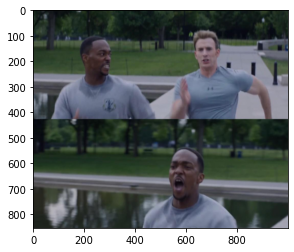

In [25]:
# i didn't manipulate the data, so the image remained intact
plt.imshow(Inverse)